# SciPy

<table class="ArticleTableNoBorder">
	<tbody>
		<tr>
			<td><strong>Pacote</strong></td>
			<td><strong>Descrição</strong></td>
		</tr>
		<tr>
			<td><code>cluster</code></td>
			<td>Clustering algorithms</td>
		</tr>
		<tr>
			<td><code>constants</code></td>
			<td>Mathematical and physical constants</td>
		</tr>
		<tr>
			<td><code>fftpack</code></td>
			<td>Fourier transforms</td>
		</tr>
		<tr>
			<td><code>integrate</code></td>
			<td>Numerical integration</td>
		</tr>
		<tr>
			<td><code>interpolate</code></td>
			<td>Interpolation</td>
		</tr>
		<tr>
			<td><code>io</code></td>
			<td>Input and output</td>
		</tr>
		<tr>
			<td><code>linalg</code></td>
			<td>Linear algebra</td>
		</tr>
		<tr>
			<td><code>maxentropy</code></td>
			<td>Maximum entropy models</td>
		</tr>
		<tr>
			<td><code>misc</code></td>
			<td>Miscellaneous</td>
		</tr>
		<tr>
			<td><code>ndimage</code></td>
			<td>Multi-dimensional image processing</td>
		</tr>
		<tr>
			<td><code>odr</code></td>
			<td>Orthogonal distance regression</td>
		</tr>
		<tr>
			<td><code>optimize</code></td>
			<td>Optimization</td>
		</tr>
		<tr>
			<td><code>signal</code></td>
			<td>Signal processing</td>
		</tr>
		<tr>
			<td><code>sparse</code></td>
			<td>Sparse matrices</td>
		</tr>
		<tr>
			<td><code>spatial</code></td>
			<td>Spatial algorithms and data structures</td>
		</tr>
		<tr>
			<td><code>special</code></td>
			<td>Special functions</td>
		</tr>
		<tr>
			<td><code>stats</code></td>
			<td>Statistical functions</td>
		</tr>
		<tr>
			<td><code>stsci</code></td>
			<td>Image processing</td>
		</tr>
		<tr>
			<td><code>weave</code></td>
			<td>C/C++ integration</td>
		</tr>
	</tbody>
</table>


# Processamento de Imagens

In [1]:
import scipy
scipy.__version__

'1.9.1'

In [2]:
import matplotlib
matplotlib.__version__

'3.5.2'

# Integracao Numerica

In [7]:
import numpy as np 
np.__version__

'1.21.5'

In [8]:
from numpy import * 
from scipy.integrate import quad, dblquad, tplquad

In [9]:
# Integracao
val, abserr = quad(lambda x: exp(-x ** 2), Inf, Inf)
val, abserr

(0.0, 0.0)

In [10]:
from scipy.integrate import odeint, ode

In [11]:
from pylab import *
%matplotlib inline

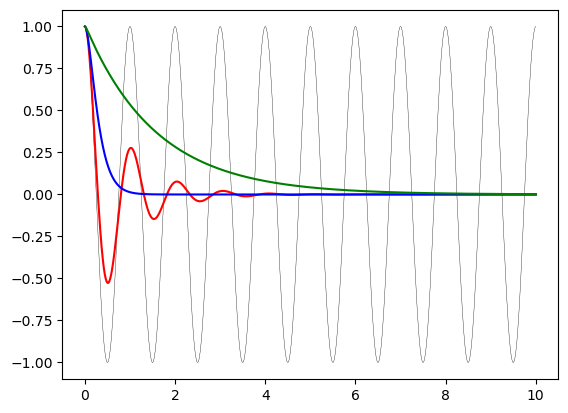

In [13]:
def dy(y, t, zeta, w0):
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]


y0 = [1.0, 0.0]

t = linspace(0, 10, 1000)
w0 = 2*pi*1.0


y1 = odeint(dy, y0, t, args=(0.0, w0)) 
y2 = odeint(dy, y0, t, args=(0.2, w0)) 
y3 = odeint(dy, y0, t, args=(1.0, w0)) 
y4 = odeint(dy, y0, t, args=(5.0, w0)) 

fig, ax = subplots()
ax.plot(t, y1[:,0], 'k', label="Não Abafado", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="Pouco Abafado")
ax.plot(t, y3[:,0], 'b', label="Criticamente Abafado")
ax.plot(t, y4[:,0], 'g', label="Perigosamente Abafado")


# Fourier Transformation

In [15]:
from scipy.fftpack import * 

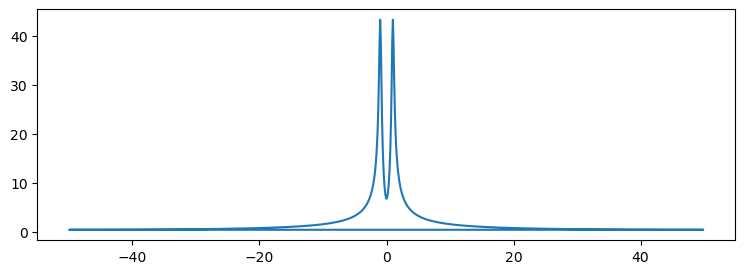

In [16]:
# Fourier transformation
N = len(t)
dt = t[1]-t[0]

F = fft(y2[:,0])

w = fftfreq(N, dt)

fig, ax = subplots(figsize=(9,3))
ax.plot(w, abs(F));

# Algebra Linear 

In [20]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

In [21]:
# Resolvendo um sistema de equacoes lineares
x = solve(A, b)
x 

array([ 2., -2.,  9.])

In [22]:
A = rand(3,3)
B = rand(3,3)

evals, evecs = eig(A)

evals

array([ 1.71013868+0.j        , -0.25523057+0.37729327j,
       -0.25523057-0.37729327j])

In [23]:
evecs

array([[ 0.64902315+0.j        ,  0.62229827+0.j        ,
         0.62229827-0.j        ],
       [ 0.49570289+0.j        , -0.36293198+0.47616375j,
        -0.36293198-0.47616375j],
       [ 0.57710276+0.j        , -0.34934491-0.36366394j,
        -0.34934491+0.36366394j]])

In [24]:
svd(A)

(array([[-0.64209075, -0.69078389,  0.33247118],
        [-0.51129014,  0.70900773,  0.48568553],
        [-0.57122838,  0.14186495, -0.80843829]]),
 array([1.71352178, 0.58746268, 0.35250442]),
 array([[-0.61461991, -0.47594591, -0.62906109],
        [ 0.05739339, -0.8223355 ,  0.56610098],
        [-0.78673271,  0.31183299,  0.53273992]]))

# Otimizacao

In [25]:
from scipy import optimize

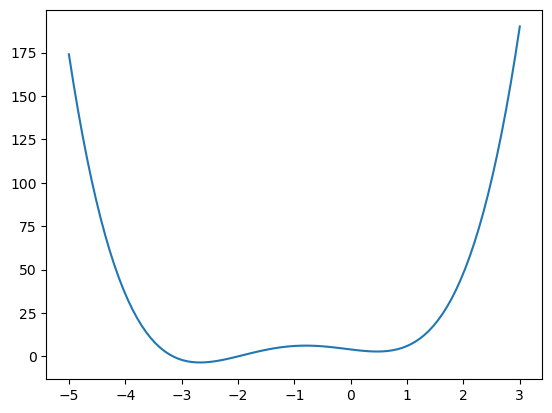

In [26]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax = subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

In [27]:
x_min = optimize.fmin_bfgs(f, -0.5)
x_min

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 4
         Function evaluations: 12
         Gradient evaluations: 6


array([0.46961743])

# Estatistica

In [28]:
from scipy import stats 

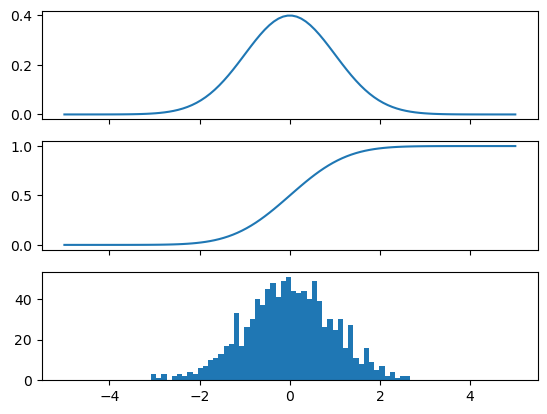

In [29]:
Y = stats.norm()

x = linspace(-5, 5, 100)

fig, axes = subplots(3,1, sharex=True)

axes[0].plot(x, Y.pdf(x))

axes[1].plot(x, Y.cdf(x));

axes[2].hist(Y.rvs(size=1000), bins=50);

In [30]:
Y.mean(), Ystd(), Y.var()

NameError: name 'Ystd' is not defined